<a href="https://colab.research.google.com/github/NeutrinoExplorer/iQuHACK2025/blob/main/Winter%20school%20training_3/Qiskit_dia3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
!pip install qiskit #instalar libreria Qiskit
!pip install qiskit-aer #instalar modulo Aer de la libreria Qiskit
!pip install pylatexenc #biblioteca de python que permite convertir textos a formato latex
!pip install helpers #modulo de Qiskit con funciones especiales


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 18.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 98.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=5001c1d0bc37d526f4ede5a6c42908e71bb65f278657715d4a3d1341dadcc112
  Stored in directory: /root/.cache/pip/wheels/b1/7a/33/9fdd892f784ed4afda62b685ae3703adf4c91aa0f524c28f03
Successfully built pylatexenc


In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt
import random

# Importing standard Qiskit libraries
import qiskit
import qiskit_aer
import pylatexenc
from qiskit import *
from qiskit_aer import *
from qiskit.compiler import transpile, assemble
from qiskit.visualization import plot_histogram, plot_bloch_vector
from qiskit.quantum_info import Statevector, DensityMatrix, random_statevector
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.circuit.library import GroverOperator, MCMT, ZGate

# QWS helpers
#from helpers import convert_to_basis_string, get_all_pauli_strings,interactive_sine_waves, double_slit_experiment

# Bokeh interactive plotting
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import Slider, ColumnDataSource, CustomJS, Range1d, Toggle, Button, SetValue
from bokeh.layouts import column, row
from bokeh.io import push_notebook
# Initialize the notebook output
output_notebook()

nshots = 10000

# ENVÍO DE ESTADOS CUÁNTICOS
1. Introducción


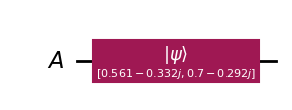

In [ ]:
#Supongamos que Alice tiene un estado cuántico arbitrario de un qubit.
# Crea un registro cuántico con un qubit, nombrado "A".
a = QuantumRegister(1, name="A")

# Crea un circuito cuántico que utiliza el registro cuántico "A".
qc = QuantumCircuit(a)

# Genera un estado cuántico aleatorio de dos dimensiones (un qubit).
state = random_statevector(2)

# Inicializa el qubit en el circuito con el estado cuántico aleatorio generado.
qc.initialize(state, [0])

# Dibuja y muestra el circuito cuántico en formato gráfico utilizando Matplotlib.
display(qc.draw('mpl'))

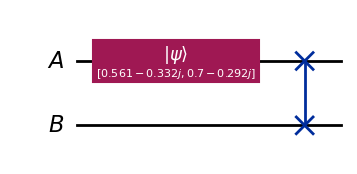

In [ ]:
#Alice quiere enviarle este estado a Bob, tal vez como parte de algún protocolo relacionado con la comunicación cuántica. ¿Cómo pueden hacerlo?

# Crea un registro cuántico con un qubit, nombrado "A".
a = QuantumRegister(1, name="A")

# Crea un segundo registro cuántico con un qubit, nombrado "B".
b = QuantumRegister(1, name="B")

# Crea un circuito cuántico que utiliza los registros cuánticos "A" y "B".
qc = QuantumCircuit(a, b)

# Inicializa el qubit en el registro "A" con un estado cuántico específico (debe definirse previamente).
qc.initialize(state, [0])  # 0 es el indique del qubit q0 llamado A

# Aplica la puerta SWAP entre el qubit en el registro "A" (índice 0) y el qubit en el registro "B" (índice 1).
qc.swap(0, 1)

# Dibuja y muestra el circuito cuántico en formato gráfico utilizando Matplotlib.
display(qc.draw('mpl'))


In [ ]:
#Alice y Bob pueden ejecutar la compuerta SWAP para intercambiar sus cúbits.
#Tenga en cuenta que Alice ya no tiene acceso a su estado (esto estaría prohibido por el teorema de no clonación).
#Sin embargo, este protocolo requiere que Alice y Bob puedan ejecutar una compuerta conjunta de dos cúbits.
#Si Alice y Bob están separados espacialmente o no pueden ejecutar una compuerta conjunta de dos cúbits, esto sería imposible. ¿Qué pueden hacer en su lugar?

# Teletransportación de estados cuánticos
La teletransportación de estados cuánticos es un protocolo elemental de computación cuántica que permite a una parte enviar a otra un estado cuántico. Todo lo que se requiere es que las partes compartan un par de Bell (estado de máxima entrelazamiento) y que el emisor pueda ejecutar localmente puertas de dos cúbits y enviar al receptor información clásica (como resultados de mediciones).

# Implementación de la Teleportation

<ipython-input-12-b4ff487345fc>:38: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.x(2).c_if(c, 1)  # Aplica X si el primer bit medido es 1
<ipython-input-12-b4ff487345fc>:39: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  qc.z(2).c_if(c, 2)  # Aplica Z si el segundo bit medido es 1


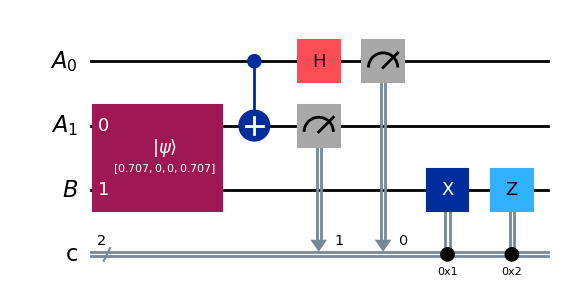

In [ ]:
#Implementar el resto del protocolo de teletransportación de estados cuánticos. Supongamos,

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit_aer import Aer
import numpy as np

#Implementar el resto del protocolo de teletransportación de estados cuánticos. Supongamos,

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile, assemble
from qiskit.primitives import Sampler # import Sampler instead of execute
from qiskit_aer import Aer
import numpy as np

# Definimos dos registros cuánticos: A (2 qubits) y B (1 qubit)
a = QuantumRegister(2, name="A")
b = QuantumRegister(1, name="B")

# Creamos un circuito cuántico con estos registros
qc = QuantumCircuit(a, b)

# Inicializamos el estado de Bell en los qubits 1 y 2
qc.initialize(Statevector([1/np.sqrt(2), 0, 0, 1/np.sqrt(2)]), [1, 2])

# Aplicamos una puerta CNOT entre el qubit 0 y el qubit 1
qc.cx(0, 1)  # Entre el estado a teletransportar y el primer qubit del par de Bell

# Aplicamos una puerta Hadamard en el qubit 0
qc.h(0)  # Superpone el estado antes de la medición

# Creamos registros clásicos para almacenar las mediciones
c = ClassicalRegister(2, name="c")
qc.add_register(c)

# Medimos los dos primeros qubits
qc.measure([0, 1], [0, 1])

# Aplicamos compuertas condicionales en el qubit 2 dependiendo de las mediciones
qc.x(2).c_if(c, 1)  # Aplica X si el primer bit medido es 1
qc.z(2).c_if(c, 2)  # Aplica Z si el segundo bit medido es 1

# Mostramos el circuito
qc.draw('mpl')

# Verificación experimental


In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer # Import Aer from qiskit_aer

# Crear un circuito cuántico con 1 qubit y 1 bit clásico
qc = QuantumCircuit(1, 1)
qc.h(0)  # Aplicar puerta Hadamard
qc.measure(0, 0)  # Medir el qubit

# Seleccionar un backend (simulador)
backend = Aer.get_backend('qasm_simulator')

# Transpilar el circuito para que sea compatible con el backend
qc_transpiled = transpile(qc, backend)

# Ejecutar el circuito en el backend
job = backend.run(qc_transpiled, shots=1000)

# Obtener los resultados
result = job.result()
counts = result.get_counts()

# Imprimir los resultados
print(counts)  # {'0': ~500, '1': ~500} debido a la superposición cuántica


{'1': 514, '0': 486}


# Entrelazamiento y medición parcial
Ahora haremos un breve desvío para hablar sobre el entrelazamiento y la medición parcial.

# Rastro parcial
A menudo preparamos estados de varios cúbits. Supongamos que medimos uno de los cúbits pero no observamos el resultado. ¿Cuál es el estado del resto del sistema, que comprende los cúbits restantes que no medimos?

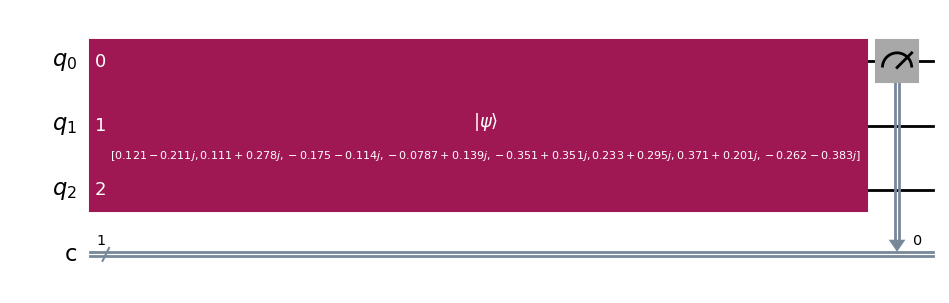

In [ ]:
# Genera un vector de estado cuántico aleatorio de 8 dimensiones (equivalente a 3 qubits).
random_state = random_statevector(8)

# Crea un circuito cuántico con 3 qubits y 1 bit clásico para la medición.
qc = QuantumCircuit(3, 1)

# Inicializa los qubits en el circuito con el estado cuántico aleatorio generado.
qc.initialize(random_state)

# Mide el estado del primer qubit (índice 0) y almacena el resultado en el bit clásico (índice 0).
qc.measure(0, 0)

# Dibuja y muestra el circuito cuántico en formato gráfico utilizando Matplotlib.
display(qc.draw('mpl'))

In [ ]:
#Dado que el estado restante depende del resultado de la medición y que la medición es probabilística, podría tener sentido
#describir el estado restante también como una mezcla probabilística.
#La representación más adecuada para esto es la matriz de densidad.

# Entropía de entrelazamiento
La entropía de entrelazamiento es una forma de cuantificar cuánto entrelazamiento hay entre dos subsistemas de un sistema cuántico más grande. Dos sistemas que no están entrelazados en absoluto (estados producto) tienen una entropía de entrelazamiento cero; como sugiere el nombre, el estado de máxima enredo tiene la entropía de entrelazamiento más alta posible para un estado de ese tamaño.

# Algoritmo Deutsch-Jozsa

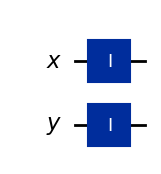

In [ ]:
# Crea un registro cuántico con 1 qubit, nombrado 'x'.
qx = QuantumRegister(1, 'x')

# Crea otro registro cuántico con 1 qubit, nombrado 'y'.
qy = QuantumRegister(1, 'y')

# Crea un circuito cuántico que utiliza los registros cuánticos 'x' y 'y'.
qc = QuantumCircuit(qx, qy)

# Aplica la puerta de identidad al qubit en el registro 'x' (índice 0).
qc.id(0)

# Aplica la puerta de identidad al qubit en el registro 'y' (índice 1).
qc.id(1)

# Dibuja y muestra el circuito cuántico en formato gráfico utilizando Matplotlib.
display(qc.draw('mpl'))

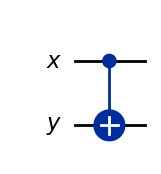

In [ ]:
# Crea un registro cuántico con 1 qubit, nombrado 'x'.
qx = QuantumRegister(1, 'x')

# Crea otro registro cuántico con 1 qubit, nombrado 'y'.
qy = QuantumRegister(1, 'y')

# Crea un circuito cuántico que utiliza los registros cuánticos 'x' y 'y'.
qc = QuantumCircuit(qx, qy)

# Aplica la puerta CNOT (Control-NOT) entre el qubit en el registro 'x' (qubit 0) y el qubit en el registro 'y' (qubit 1).
qc.cx(0, 1)

# Dibuja y muestra el circuito cuántico en formato gráfico utilizando Matplotlib.
display(qc.draw('mpl'))


# Implementando el algoritmo de Grover

*El proceso comienza con la preparación de un estado cuántico en superposición que representa todos los posibles elementos de la base de datos. Luego, se aplica un oráculo que identifica la solución correcta y se utiliza una técnica llamada amplificación de amplitud para aumentar la probabilidad de medir el estado correcto. Después de varias iteraciones, el algoritmo permite medir el qubit, lo que colapsa el estado cuántico y revela la solución deseada con alta probabilidad. Este enfoque demuestra el potencial de la computación cuántica para superar las limitaciones de los métodos clásicos en problemas de búsqueda.

*Primero lo primero, entendamos cómo se crea un oráculo de inversión de fase. Comencemos preparando un estado de superposición igual aplicando un Hadamard a cada cúbit. Luego, construyamos un oráculo de inversión de fase paso a paso.

Consideremos un sistema de dos cúbits con el estado objetivo '01'.

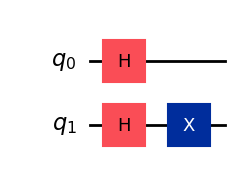

In [ ]:
#Creación de un oráculo de inversión de fase

# Define el estado objetivo como una cadena de bits.
target_state = '01'

# Calcula el número de qubits necesarios, que es igual a la longitud del estado objetivo.
num_qubits = len(target_state)

#Primero aplicamos una compuerta X a la ubicación de cualquier cero en nuestro estado objetivo.
#Seguiremos teniendo un estado de superposición igual después de esto.

# Crea un circuito cuántico con el número de qubits especificado.
qc = QuantumCircuit(num_qubits)

# Aplica la puerta Hadamard a todos los qubits para ponerlos en un estado de superposición completo.
qc.h(range(num_qubits))

# Invierte el estado objetivo para que coincida con el orden de bits de Qiskit.
rev_target = target_state[::-1]

# Encuentra los índices de todos los elementos '0' en la cadena de bits invertida.
zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]

# Si hay elementos '0', aplica la puerta X (NOT) a esos qubits.
if len(zero_inds) > 0:
    qc.x(zero_inds)

# Dibuja y muestra el circuito cuántico en formato gráfico utilizando Matplotlib.
qc.draw('mpl')

In [ ]:
#Podemos imprimir el vector de estado al final del circuito para ver qué está pasando.
display(Statevector(qc).draw('latex'))


<IPython.core.display.Latex object>

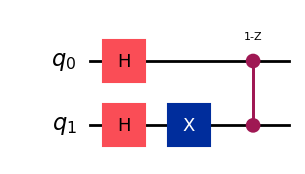

In [ ]:
#Ahora, agreguemos una compuerta Z con múltiples controles, que se controla en los primeros (n-1)qubits y se dirige al último qubit.
#El efecto de esto es que cambia la fase de cualquier estado con todos 1. Esto se debe a que necesitamos que todos los 1 estén en el primer (n-1)
#qubit para que se cumpla la condición de control, y necesitamos que el último qubit sea 1 para que la compuerta Z tenga un efecto de cambio de fase.

# Crea un circuito cuántico con el número de qubits especificado.
qc = QuantumCircuit(num_qubits)

# Aplica la puerta Hadamard a todos los qubits para ponerlos en un estado de superposición completo.
qc.h(range(num_qubits))

# Invierte el estado objetivo para que coincida con el orden de bits de Qiskit.
rev_target = target_state[::-1]

# Encuentra los índices de todos los elementos '0' en la cadena de bits invertida.
zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]

# Si hay elementos '0', aplica la puerta X (NOT) a esos qubits.
if len(zero_inds) > 0:
    qc.x(zero_inds)

# Aplica una puerta de tipo MCMT (Multi-Controlled Multi-Target) con una puerta Z al circuito.
qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)

# Dibuja y muestra el circuito cuántico en formato gráfico utilizando Matplotlib.
qc.draw('mpl')


In [ ]:
display(Statevector(qc).draw('latex')) #mostrar al vector en notacion Dirac

<IPython.core.display.Latex object>

In [ ]:
# Ahora podemos aplicar las puertas X nuevamente a cualquier posición de 0 en el estado objetivo.
# Esto garantiza que el cambio de fase se mueva nuevamente al estado objetivo (en lugar de permanecer en |11>).

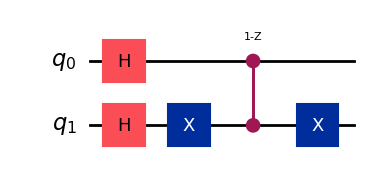

In [ ]:
# Crea un circuito cuántico con el número de qubits especificado.
qc = QuantumCircuit(num_qubits)

# Aplica la puerta Hadamard a todos los qubits para ponerlos en un estado de superposición completo.
qc.h(range(num_qubits))

# Invierte el estado objetivo para que coincida con el orden de bits de Qiskit.
rev_target = target_state[::-1]

# Encuentra los índices de todos los elementos '0' en la cadena de bits invertida.
zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]

# Si hay elementos '0', aplica la puerta X (NOT) a esos qubits para invertirlos.
if len(zero_inds) > 0:
    qc.x(zero_inds)

# Aplica una puerta MCMT (Multi-Controlled Multi-Target) con una puerta Z al circuito.
# Esto actúa como un oráculo, marcando el estado objetivo con una fase negativa.
qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)

# Si se aplicaron puertas X anteriormente, se vuelven a aplicar para devolver los qubits a su estado original.
if len(zero_inds) > 0:
    qc.x(zero_inds)

# Dibuja y muestra el circuito cuántico en formato gráfico utilizando Matplotlib.
qc.draw('mpl')


In [ ]:
display(Statevector(qc).draw('latex')) #mostrar al vector en noatcion Dirac


<IPython.core.display.Latex object>

# El algoritmo completo
Ahora veamos el algoritmo completo en acción. Primero podemos definir el oráculo de inversión de fase de Grover. Este toma "estados marcados" (también conocidos como estados objetivo) como entrada y genera el oráculo de inversión de fase correcto según la técnica que mostramos anteriormente. Este es un oráculo más general, porque puede ingresar más de un estado objetivo si lo desea. Simplemente repite el algoritmo de inversión de fase anterior para cada estado objetivo.

In [ ]:
def grover_oracle(marked_states):
    """Construye un oráculo de Grover para múltiples estados marcados.

    Aquí asumimos que todos los estados marcados de entrada tienen el mismo número de bits.

    Parámetros:
        marked_states (str o list): Estados marcados del oráculo.

    Retorna:
        QuantumCircuit: Circuito cuántico que representa el oráculo de Grover.
    """
    # Si 'marked_states' no es una lista, conviértelo en una lista.
    if not isinstance(marked_states, list):
        marked_states = [marked_states]

    # Calcula el número de qubits en el circuito, basado en el primer estado marcado.
    num_qubits = len(marked_states[0])

    # Crea un nuevo circuito cuántico con el número de qubits especificado.
    qc = QuantumCircuit(num_qubits)

    # Marca cada estado objetivo en la lista de estados marcados.
    for target in marked_states:
        # Invierte el estado objetivo para que coincida con el orden de bits de Qiskit.
        rev_target = target[::-1]

        # Encuentra los índices de todos los elementos '0' en la cadena de bits invertida.
        zero_inds = [ind for ind in range(num_qubits) if rev_target.startswith("0", ind)]

        # Agrega una puerta Z multi-controlada con puertas X aplicadas antes y después (controles abiertos),
        # donde la cadena de bits objetivo tiene una entrada '0'.
        if len(zero_inds) > 0:
            qc.x(zero_inds)  # Aplica puertas X a los qubits que deben ser invertidos.

        # Aplica la puerta Z multi-controlada, controlada por todos los qubits excepto el último.
        qc.compose(MCMT(ZGate(), num_qubits - 1, 1), inplace=True)

        if len(zero_inds) > 0:
            qc.x(zero_inds)  # Restaura los qubits a su estado original.

        qc.barrier()  # Agrega una barrera para separar las operaciones en el circuito.

    return qc  # Retorna el circuito cuántico que representa el oráculo de Grover.


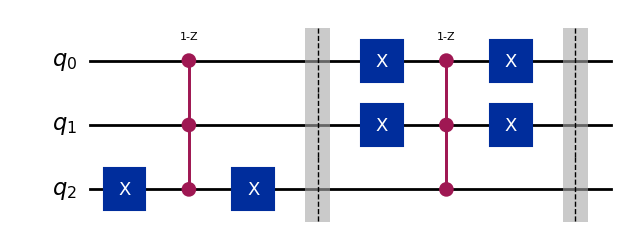

In [ ]:
# Veamos el oráculo Grover en acción para 3 qubits y dos estados marcados.

# Define una lista de estados marcados que se desean identificar con el oráculo de Grover.
marked_states = ["011", "100"]

# Llama a la función 'grover_oracle' para construir el oráculo cuántico basado en los estados marcados.
oracle = grover_oracle(marked_states)

# Dibuja y muestra el circuito cuántico del oráculo utilizando Matplotlib.
oracle.draw('mpl')


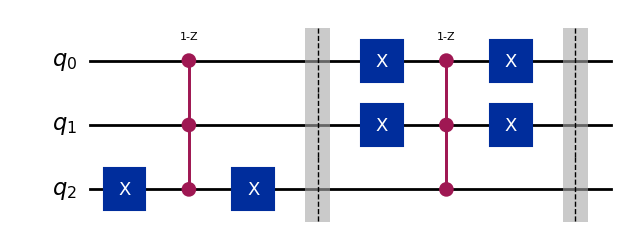

In [ ]:
# Podemos utilizar el algoritmo de operador Grover integrado de Qiskit para hacer el resto. Toma el oráculo que hemos definido anteriormente como entrada e implementa el protocolo de
# amplificación de amplitud descrito anteriormente.

# Define una lista de estados marcados que se desean identificar con el oráculo de Grover.
marked_states = ["011", "100"]

# Llama a la función 'grover_oracle' para construir el oráculo cuántico basado en los estados marcados.
oracle = grover_oracle(marked_states)

# Dibuja y muestra el circuito cuántico del oráculo utilizando Matplotlib.
oracle.draw('mpl')


# MATRIZ DE DENSIDAD
Como aprendimos en clase, otra forma de representar estados cuánticos además de la notación braket es con matrices de densidad.

<IPython.core.display.Latex object>

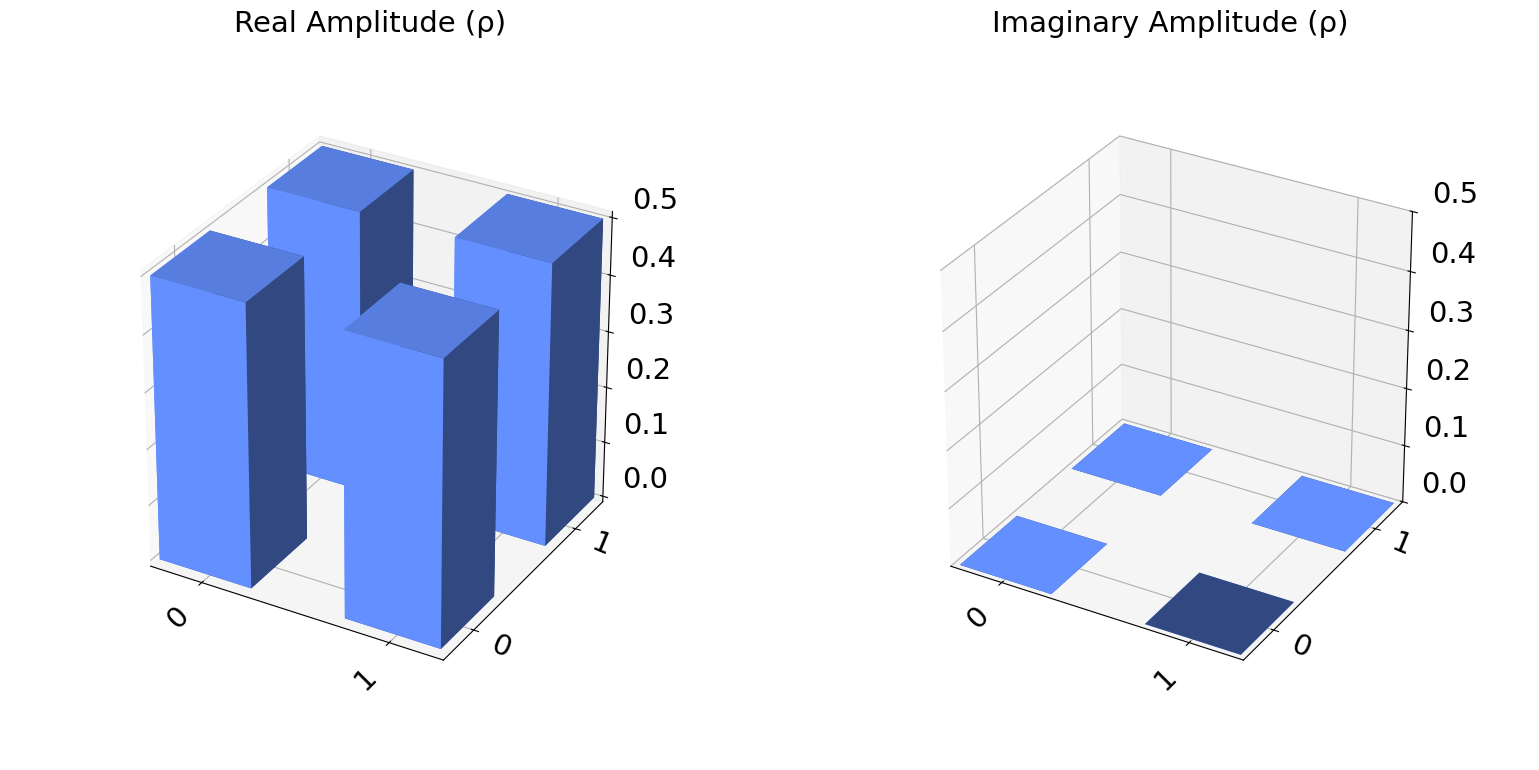

In [ ]:
# Muestra el vector de estado correspondiente al estado |+⟩ en notación de Dirac utilizando LaTeX.
display(Statevector.from_label("+").draw('latex'))

# Muestra el vector de estado correspondiente al estado |+⟩ en un formato de visualización de ciudad.
display(Statevector.from_label("+").draw('city'))


<IPython.core.display.Latex object>

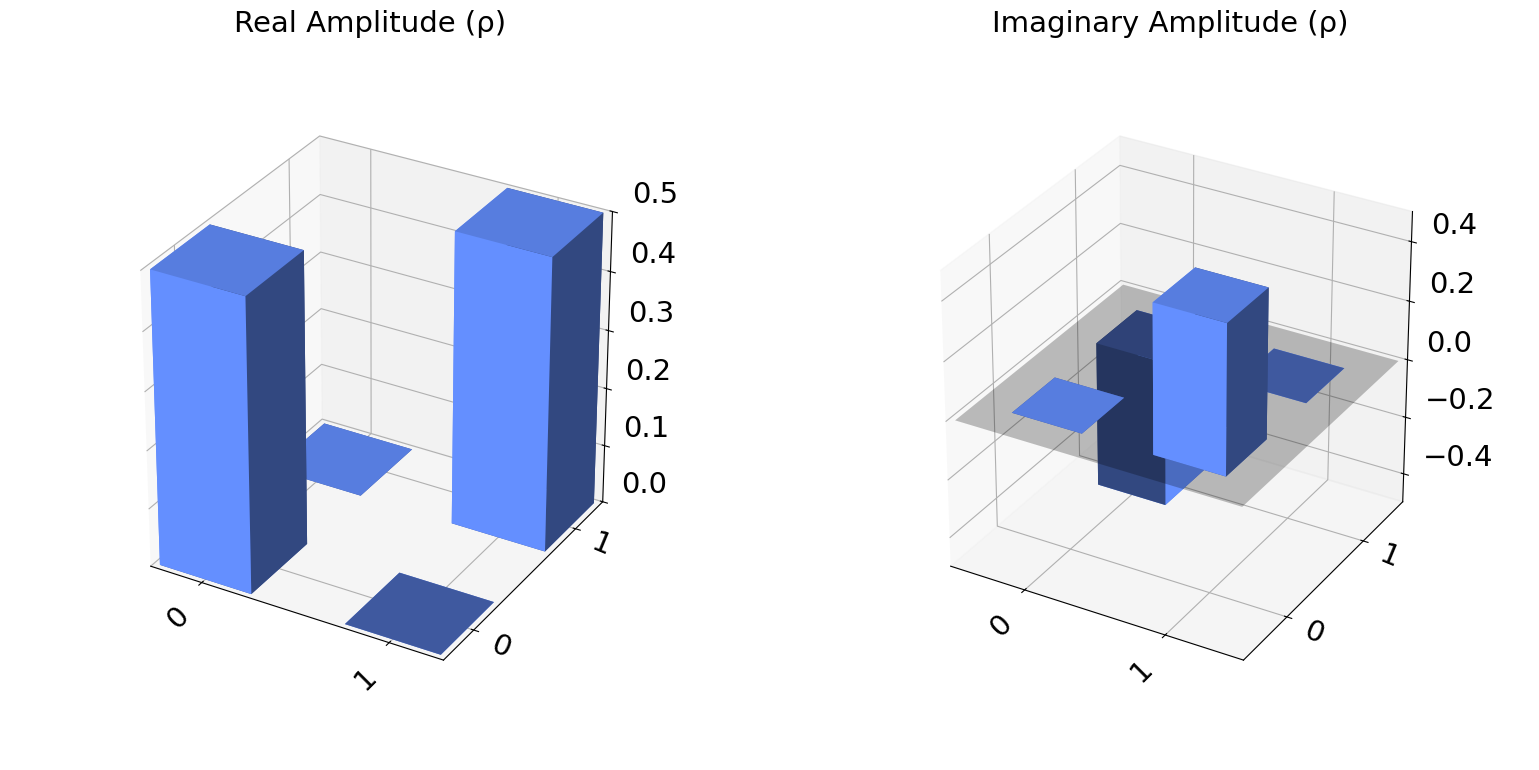

In [ ]:
# Muestra el vector de estado correspondiente al estado |l⟩ en notación de Dirac utilizando LaTeX.
display(Statevector.from_label("l").draw('latex'))

# Muestra el vector de estado correspondiente al estado |l⟩ en un formato de visualización de ciudad.
display(Statevector.from_label("l").draw('city'))


In [ ]:
# Generemos nuevamente los cuatro estados cardinales y permutémoslos aleatoriamente.
import random
from qiskit.quantum_info import Statevector

# Selecciona aleatoriamente cuatro vectores de estado de una lista de opciones.
state1, state2, state3, state4 = random.sample([
    Statevector.from_label('+'),  # Estado |+⟩
    Statevector.from_label('-'),  # Estado |-⟩
    Statevector.from_label('r'),   # Estado |r⟩ (debe estar definido en tu contexto)
    Statevector.from_label('l')    # Estado |l⟩ (debe estar definido en tu contexto)
], 4)  # Se seleccionan 4 elementos sin reemplazo.


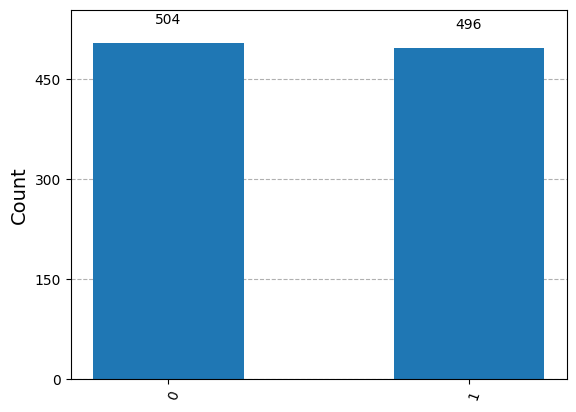

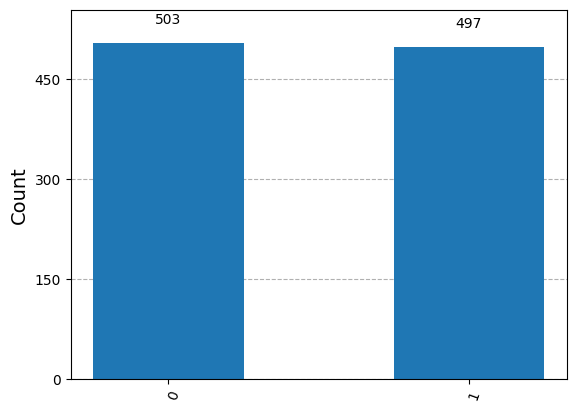

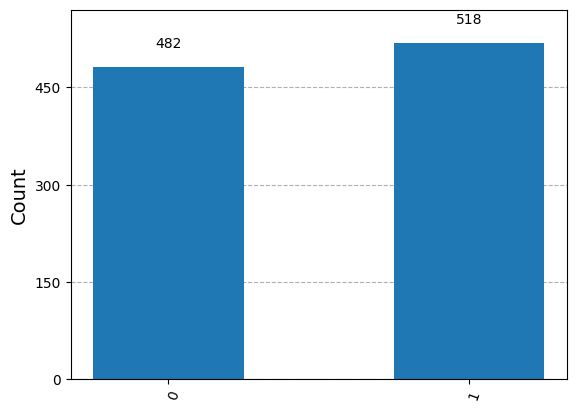

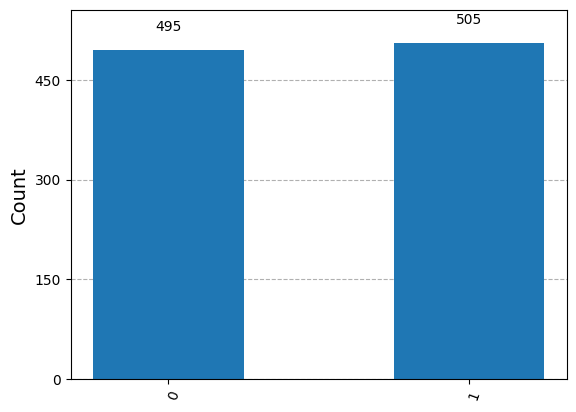

In [ ]:
# Medir sólo en la base Z no es muy útil, como hemos comentado anteriormente. Las distribuciones son idénticas.

# Supongamos que 'nshots' es el número de mediciones que deseas realizar para cada estado.
nshots = 1000  # Definir el número de disparos (shots) para la simulación.

# Muestra el histograma de las cuentas muestreadas del primer estado.
display(plot_histogram(state1.sample_counts(nshots)))

# Muestra el histograma de las cuentas muestreadas del segundo estado.
display(plot_histogram(state2.sample_counts(nshots)))

# Muestra el histograma de las cuentas muestreadas del tercer estado.
display(plot_histogram(state3.sample_counts(nshots)))

# Muestra el histograma de las cuentas muestreadas del cuarto estado.
display(plot_histogram(state4.sample_counts(nshots)))



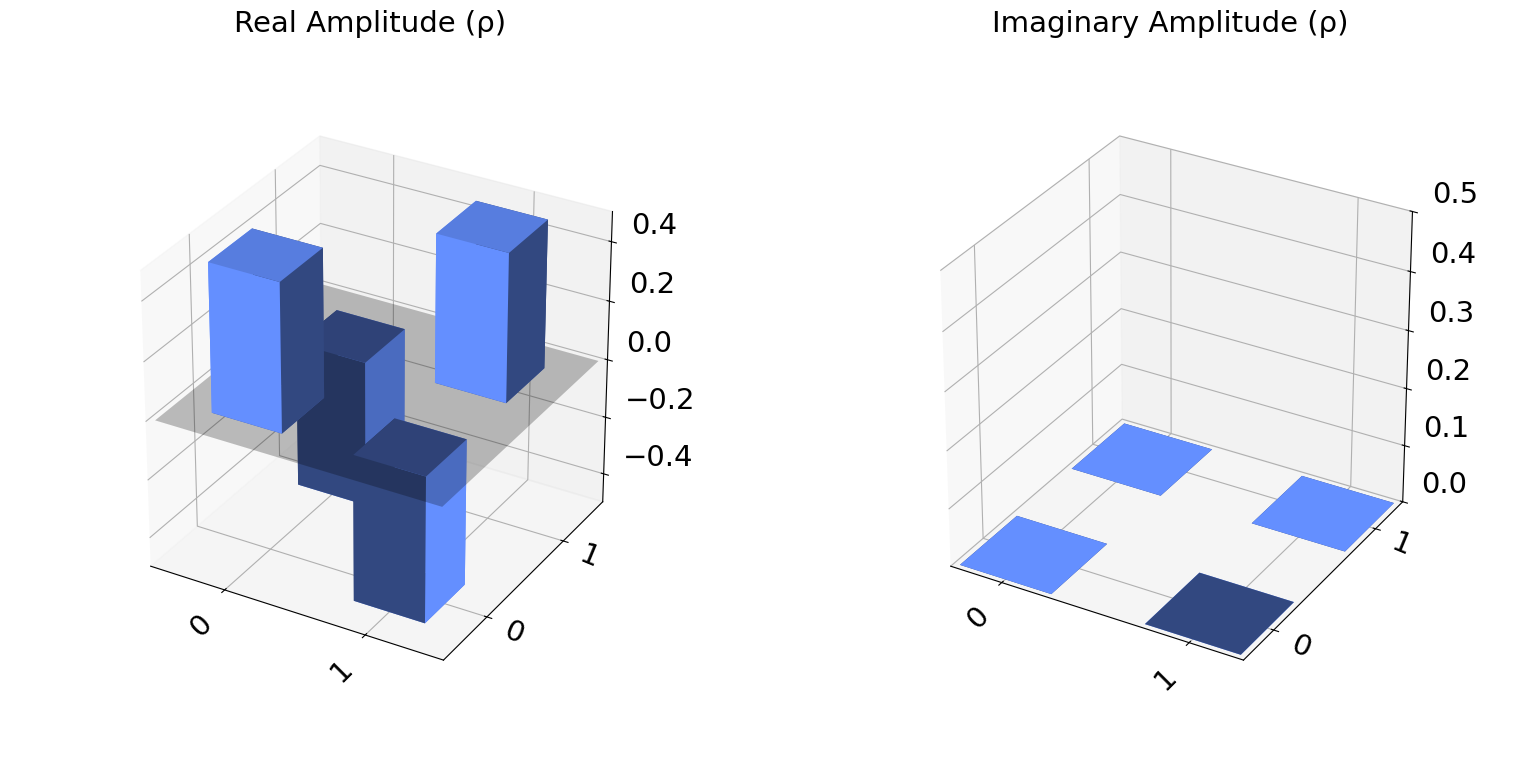

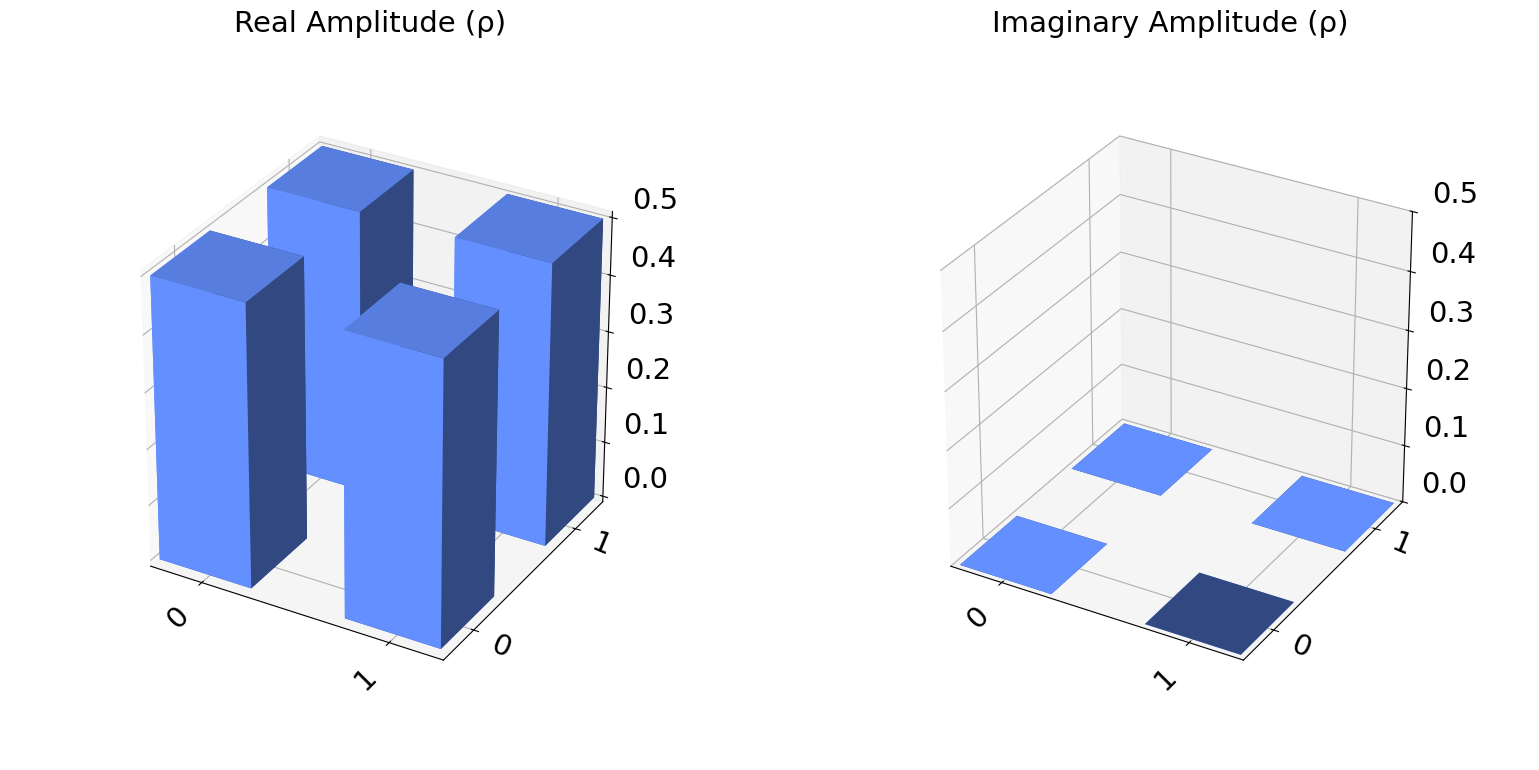

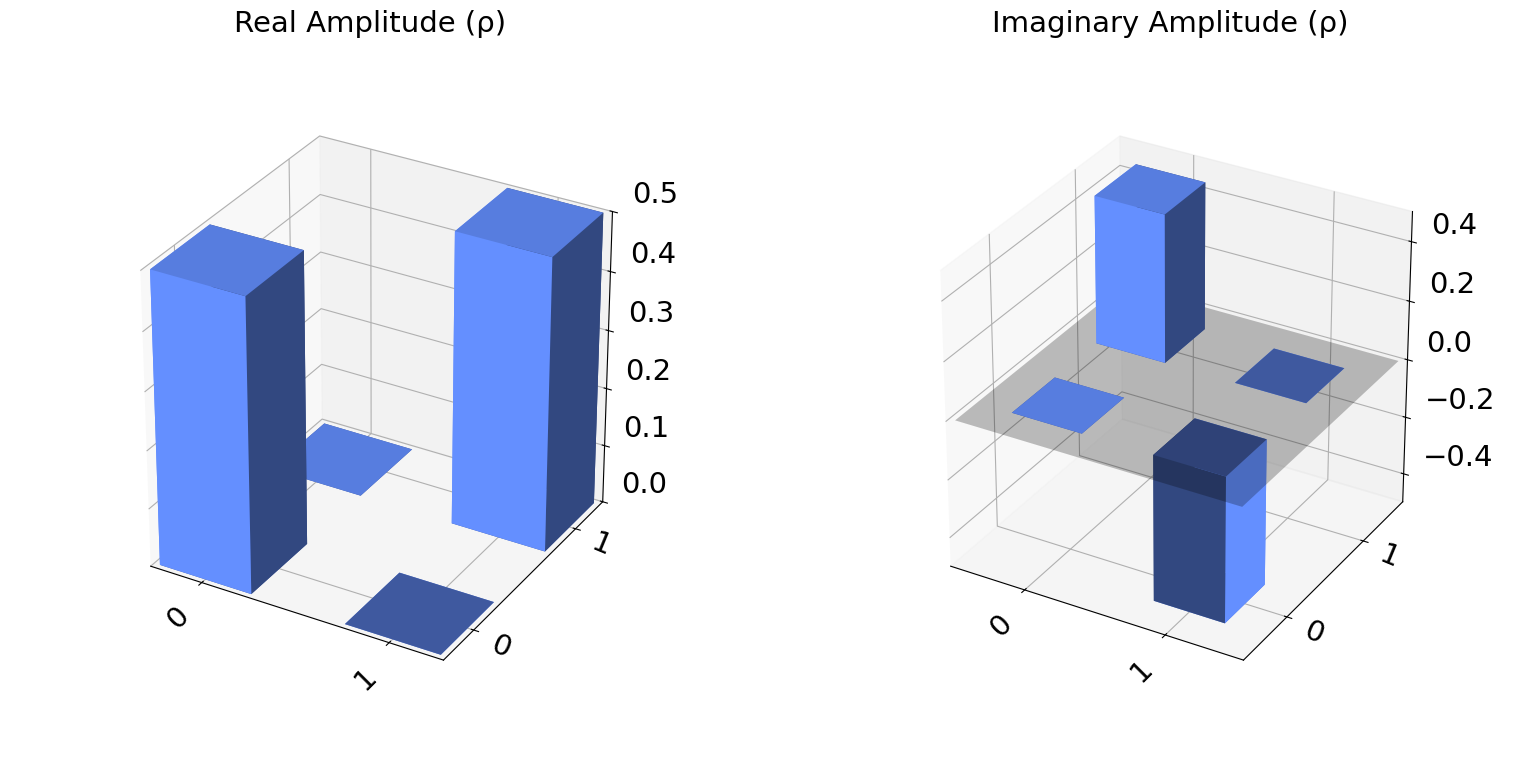

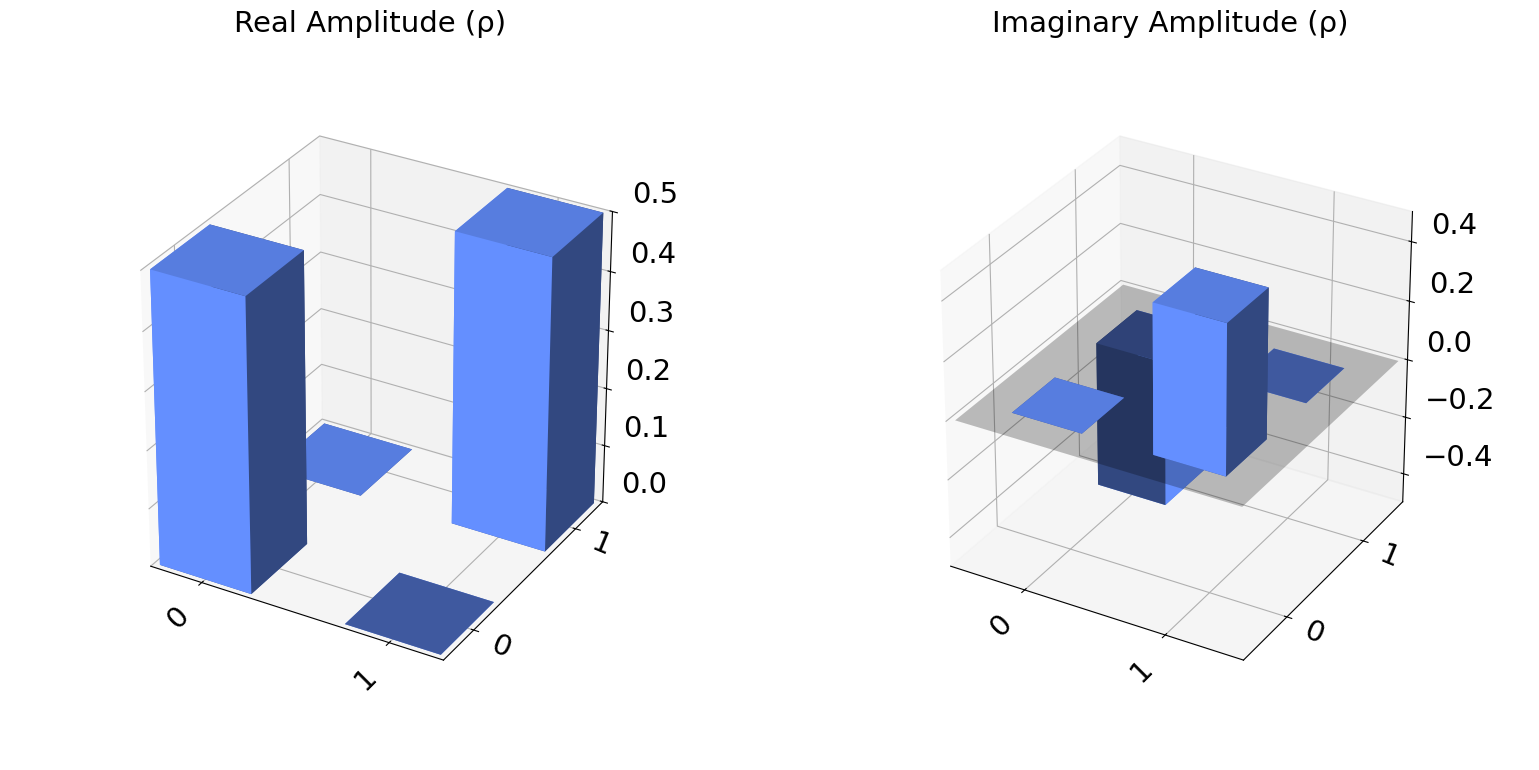

In [ ]:
# Muestra la representación gráfica del estado cuántico 'state1' en formato de ciudad.
display(state1.draw('city'))

# Muestra la representación gráfica del estado cuántico 'state2' en formato de ciudad.
display(state2.draw('city'))

# Muestra la representación gráfica del estado cuántico 'state3' en formato de ciudad.
display(state3.draw('city'))

# Muestra la representación gráfica del estado cuántico 'state4' en formato de ciudad.
display(state4.draw('city'))
